# IoT sensor failure prediction

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv('iot_sensor_data.csv')
df.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,pass
1,190,1,3,3,5,1,20,4,1,fail
2,31,7,2,2,6,1,24,6,1,fail
3,83,4,3,4,5,1,28,6,1,fail
4,23,6,na,2,9,0,23,4,1,fail


### Checking for nil values in the dataset

In [146]:
df[df.isna().any(axis=1)]

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
43,0,0,9,2,1,-2,47,6,3,NaN
82,na,7,1,8,4,7,2,5,fail,NaN


### dropping the nil values

In [147]:
df = df.dropna()

### Description of the dataset

In [148]:
df.describe()

,DoleLR,PID,outpressure,inpressure
count,957.000000,957.000000,957.000000,957.000000
mean,5.398119,2.870428,46.962382,4.574713
std,1.280411,2.292414,16.518680,1.608004
min,1.000000,0.000000,3.000000,1.000000
25%,5.000000,1.000000,34.000000,3.000000
50%,6.000000,2.000000,44.000000,4.000000
75%,6.000000,5.000000,58.000000,6.000000
max,9.000000,9.000000,91.000000,9.000000


### Dropping the PID column as it is insignifant to the results

In [149]:
df = df.drop('PID', 1)

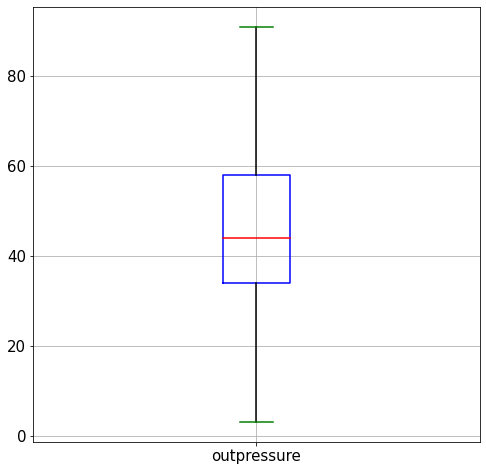

In [150]:
df.boxplot(column=['outpressure'],return_type='axes', figsize= (8,8), fontsize=15, boxprops=dict(linestyle='-', linewidth=1.5, color='b'), 
          flierprops=dict(linestyle='-', linewidth=1.5),
          medianprops=dict(linestyle='-', linewidth=1.5, color='r'),
          whiskerprops=dict(linestyle='-', linewidth=1.5),
          capprops=dict(linestyle='-', linewidth=1.5, color='g'));

### Description of the cleaned dataset

In [151]:
df.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,outpressure,inpressure,temp,fail
0,0,7,7,1,6,36,3,1,pass
1,190,1,3,3,5,20,4,1,fail
2,31,7,2,2,6,24,6,1,fail
3,83,4,3,4,5,28,6,1,fail
4,23,6,na,2,9,23,4,1,fail


In [152]:
df.fail.value_counts()

fail    554
pass    399
na        4
Name: fail, dtype: int64

### Converting the NA values to 0

In [153]:
df.footfall = df.footfall.replace(['na'], '0')
df.atemp = df.atemp.replace(['na'], '0')
df.selfLR = df.selfLR.replace(['na'], '0')
df.ClinLR = df.ClinLR.replace(['na'], '0')
df['footfall'] = df['footfall'].astype(int)
df['atemp'] = df['atemp'].astype(int)
df['selfLR'] = df['selfLR'].astype(int)
df['ClinLR'] = df['ClinLR'].astype(int)
df['temp'] = df['temp'].astype(int)


### Converting pass to 1 and fail to 0

In [154]:
df['fail'] = df['fail'].replace(['fail', 'pass'],['1', '0'])
df.fail = df.fail.replace(['na'], '0')
df['fail'] = df['fail'].astype(int)

### Checking the fail values

In [155]:
df.fail.values

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

### Plotting the correlation matrix

In [156]:
def plotCorrelationMatrix(df, graphWidth):
    fig = plt.figure(figsize=(19, 15))
    plt.matshow(df.corr(), fignum=fig.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);

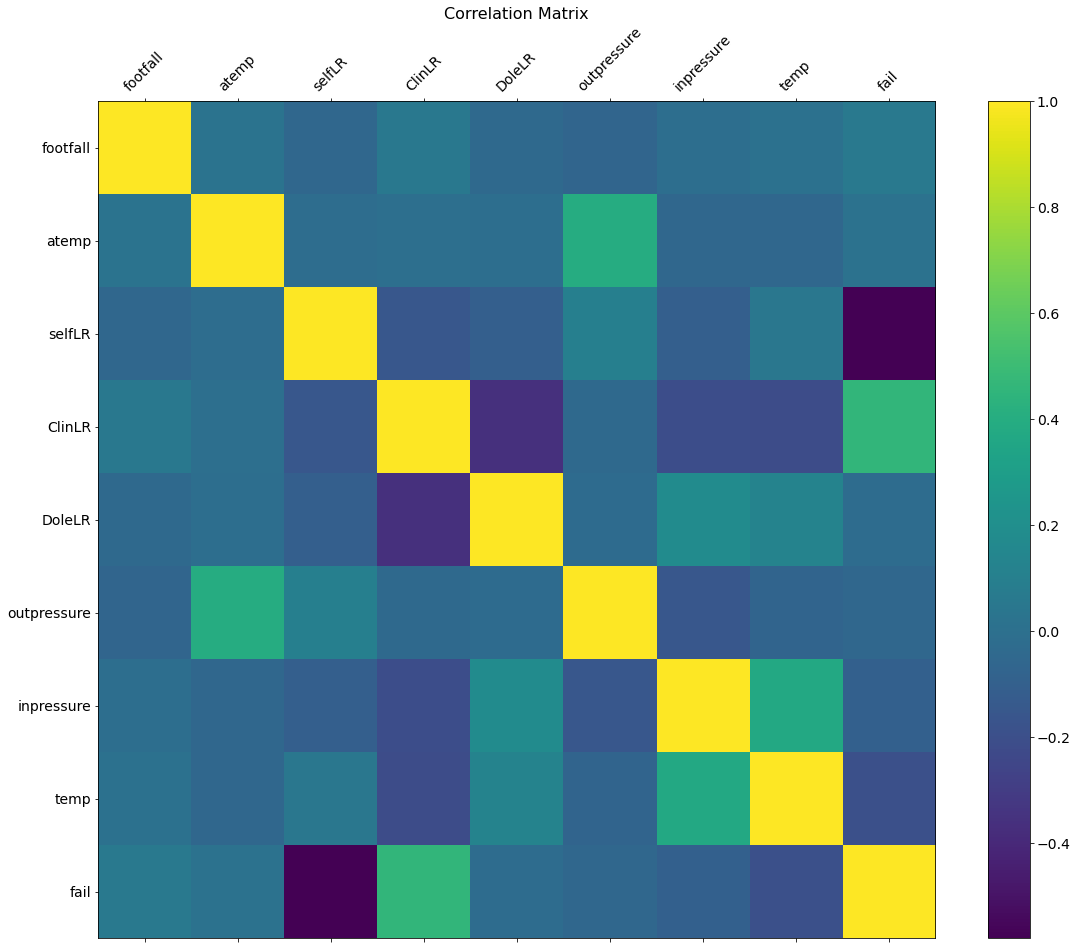

In [157]:
plotCorrelationMatrix(df, 10)

### Turning fail column to string type

In [158]:
df['fail'] = df['fail'].astype('str')


### Splitting the dataset into train and test split

In [159]:
from sklearn.model_selection import train_test_split

X = df.drop(labels = ['fail'], axis=1)
Y = df.fail
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

### Implementing Decision Tree Algorithm

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_prediction = DT.predict(X_test)
accuracy_of_DT = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_DT = f1_score(y_test, y_prediction, average='macro')
recall_of_DT = recall_score(y_test, y_prediction, average='macro')

print("F1 score of DT: ", f1_of_DT)
print("Recall score of DT: ", recall_of_DT)
print("accuracy of DT: ", accuracy_of_DT)


F1 score of DT:  0.738407883258692
Recall score of DT:  0.7356540260608085
accuracy of DT:  74.8


### Implementing Gaussian Naive Bayes Algorithm

In [161]:
from sklearn.naive_bayes import GaussianNB

GS = GaussianNB()
GS.fit(X_train, y_train)
y_prediction = GS.predict(X_test)
accuracy_of_GS = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_GS = f1_score(y_test, y_prediction, average='macro')
recall_of_GS = recall_score(y_test, y_prediction, average='macro')

print("F1 score of GS: ", f1_of_GS)
print("Recall score of GS: ", recall_of_GS)
print("accuracy of GS: ", accuracy_of_GS)

F1 score of GS:  0.8229758417757236
Recall score of GS:  0.8167529791736273
accuracy of GS:  83.16


### Implementing Gradient Boosting Classifier Algorithm

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

GBK = GradientBoostingClassifier()
GBK.fit(X_train, y_train)
y_prediction = GBK.predict(X_test)
accuracy_of_GBK = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_GBK = f1_score(y_test, y_prediction, average='macro')
recall_of_GBK = recall_score(y_test, y_prediction, average='macro')

print("F1 score of GBK: ", f1_of_GBK)
print("Recall score of GBK: ", recall_of_GBK)
print("accuracy of GBK: ", accuracy_of_GBK)

F1 score of GBK:  0.8162354659686422
Recall score of GBK:  0.8114350150350819
accuracy of GBK:  82.38


### Implementing KNN algorithm

In [163]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_prediction = KNN.predict(X_test)
accuracy_of_knn = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_knn = f1_score(y_test, y_prediction, average='macro')
recall_of_knn = recall_score(y_test, y_prediction, average='macro')

print("F1 score of knn: ", f1_of_knn)
print("Recall score of knn: ", recall_of_knn)
print("accuracy of knn: ", accuracy_of_knn)

F1 score of knn:  0.5613386732955853
Recall score of knn:  0.5664954337899544
accuracy of knn:  59.4


### Implementing Logistic Regression algorithm

In [164]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_prediction = LR.predict(X_test)
accuracy_of_LR = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_LR = f1_score(y_test, y_prediction, average='macro')
recall_of_LR = recall_score(y_test, y_prediction, average='macro')

print("F1 score of LR: ", f1_of_LR)
print("Recall score of LR: ", recall_of_LR)
print("accuracy of LR: ", accuracy_of_LR)

F1 score of LR:  0.8218753272849593
Recall score of LR:  0.8171497382782047
accuracy of LR:  82.9


/home/apoorva/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Implementing Single Layer Perceptron

In [165]:
from sklearn.linear_model import Perceptron

PR = Perceptron()
PR.fit(X_train, y_train)
y_prediction = PR.predict(X_test)
accuracy_of_PR = round(accuracy_score(y_prediction, y_test) * 100, 2)

f1_of_PR = f1_score(y_test, y_prediction, average='macro')
recall_of_PR = recall_score(y_test, y_prediction, average='macro')

print("F1 score of PR: ", f1_of_PR)
print("Recall score of PR: ", recall_of_PR)
print("accuracy of PR: ", accuracy_of_PR)

F1 score of PR:  0.5546282189986237
Recall score of PR:  0.5600219957679029
accuracy of PR:  58.75


### Implementing Random Forest Algorithm

In [166]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_prediction = RF.predict(X_test)
accuracy_of_RF = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_RF = f1_score(y_test, y_prediction, average='macro')
recall_of_RF = recall_score(y_test, y_prediction, average='macro')

print("F1 score of RF: ", f1_of_RF)
print("Recall score of RF: ", recall_of_RF)
print("accuracy of RF: ", accuracy_of_RF)

F1 score of RF:  0.8153154125733203
Recall score of RF:  0.8087481902216282
accuracy of RF:  82.51


### Implementing Gradient Descent algorithm

In [167]:
from sklearn.linear_model import SGDClassifier

GD = SGDClassifier()
GD.fit(X_train, y_train)
y_prediction = GD.predict(X_test)
accuracy_of_GD = round(accuracy_score(y_prediction, y_test) * 100, 2)

f1_of_GD = f1_score(y_test, y_prediction, average='macro')
recall_of_GD = recall_score(y_test, y_prediction, average='macro')

print("F1 score of GD: ", f1_of_GD)
print("Recall score of GD: ", recall_of_GD)
print("accuracy of GD: ", accuracy_of_GD)

F1 score of GD:  0.5589251439539347
Recall score of GD:  0.5763308831718454
accuracy of GD:  61.62


### Implementing Support Vector Machine algorithm

In [168]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train, y_train)
y_prediction = SVM.predict(X_test)
accuracy_of_SVM = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_SVM = f1_score(y_test, y_prediction, average='macro')
recall_of_SVM = recall_score(y_test, y_prediction, average='macro')

print("F1 score of SVM: ", f1_of_SVM)
print("Recall score of SVM: ", recall_of_SVM)
print("accuracy of SVM: ", accuracy_of_SVM)

F1 score of SVM:  0.36378737541528233
Recall score of SVM:  0.5
accuracy of SVM:  57.18


### Implementing Linear Support Vector Classifier Algorithm

In [169]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
y_prediction = LSVC.predict(X_test)
accuracy_of_LSVC = round(accuracy_score(y_prediction, y_test) * 100, 2)
f1_of_LSVC = f1_score(y_test, y_prediction, average='macro')
recall_of_LSVC = recall_score(y_test, y_prediction, average='macro')

print("F1 score of LSVC: ", f1_of_LSVC)
print("Recall score of LSVC: ", recall_of_LSVC)
print("accuracy of LSVC: ", accuracy_of_LSVC)

F1 score of LSVC:  0.8180522565320665
Recall score of LSVC:  0.8225581913353379
accuracy of LSVC:  81.98


/home/apoorva/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [170]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC',  
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Accuracy': [accuracy_of_SVM, accuracy_of_knn, accuracy_of_LR, 
              accuracy_of_RF, accuracy_of_GS, accuracy_of_PR, accuracy_of_LSVC, accuracy_of_DT, accuracy_of_GD,
              accuracy_of_GBK],
    'F1 Score': [f1_of_SVM, f1_of_knn, f1_of_LR, 
              f1_of_RF, f1_of_GS, f1_of_PR, f1_of_LSVC, f1_of_DT, f1_of_GD,
              f1_of_GBK],
    'Recall': [recall_of_SVM, recall_of_knn, recall_of_LR, 
              recall_of_RF, recall_of_GS, recall_of_PR, recall_of_LSVC, recall_of_DT, recall_of_GD,
              recall_of_GBK]
              })
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,F1 Score,Recall
4,Naive Bayes,83.16,0.822976,0.816753
2,Logistic Regression,82.90,0.821875,0.817150
3,Random Forest,82.51,0.815315,0.808748
9,Gradient Boosting Classifier,82.38,0.816235,0.811435
6,Linear SVC,81.98,0.818052,0.822558
7,Decision Tree,74.80,0.738408,0.735654
8,Stochastic Gradient Descent,61.62,0.558925,0.576331
1,KNN,59.40,0.561339,0.566495
5,Perceptron,58.75,0.554628,0.560022
0,Support Vector Machines,57.18,0.363787,0.500000
